<a href="https://colab.research.google.com/github/qwerqc/2024-1-my-BDA/blob/main/inclass/07w_0416_tue_B_ch08_seaborn_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 07주차 B반

# 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.0 MB/s eta 0:00:00


## 그래프 설정

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

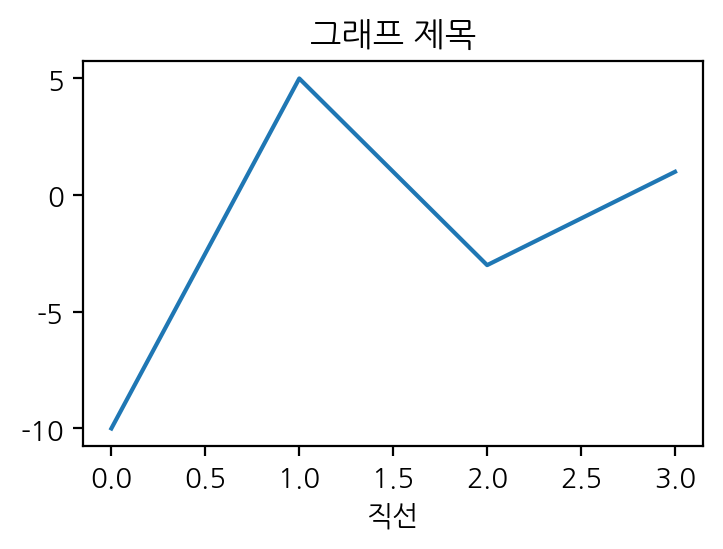

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

# 08 그래프 만들기

## 08-1 파이썬으로 만들 수 있는 그래프 살펴보기

## 08-2 산점도 - 변수 간 관계 표현하기

In [8]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.11 MiB/s, done.


### 산점도 만들기

In [9]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [11]:
mpg.describe(include="all")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [12]:
mpg.count() # NaN이 아닌 행수

manufacturer    234
model           234
displ           234
year            234
cyl             234
trans           234
drv             234
cty             234
hwy             234
fl              234
category        234
dtype: int64

In [13]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [14]:
mpg.isna().sum().sum()

0

In [39]:
mpg.shape

(234, 11)

In [16]:
mpg.fl.value_counts()

fl
r    168
p     52
e      8
d      5
c      1
Name: count, dtype: int64

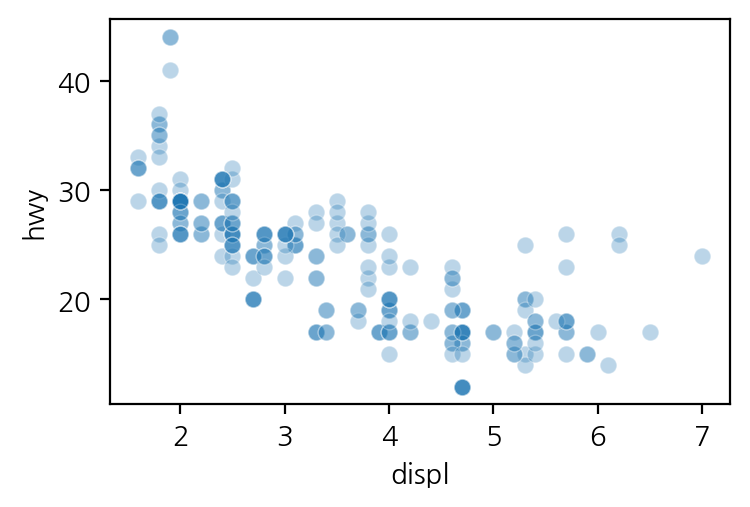

In [17]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.3);

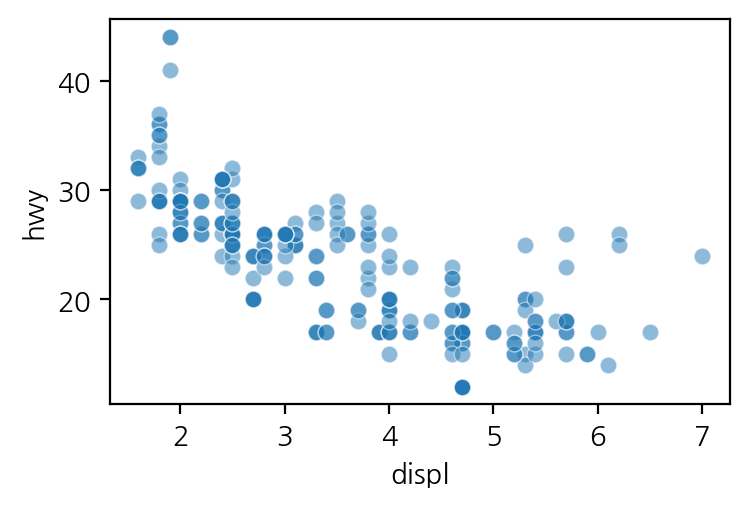

In [20]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.5);

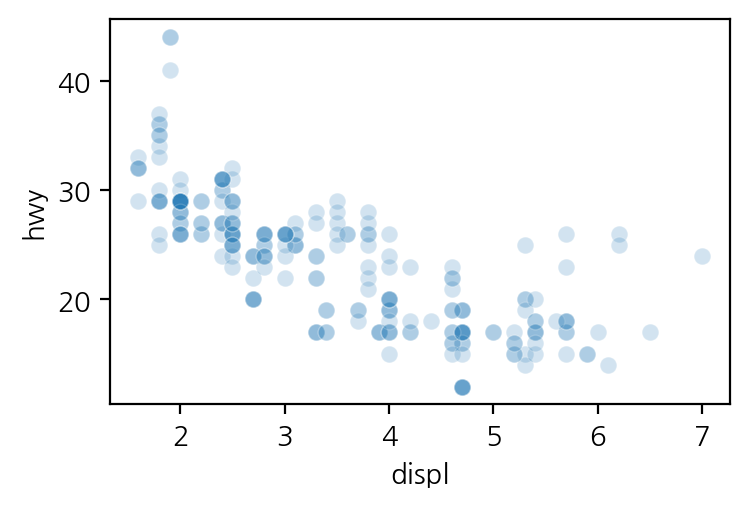

In [22]:
sns.scatterplot(mpg, x = 'displ', y = 'hwy', alpha=.2);

#### 축 범위 설정하기

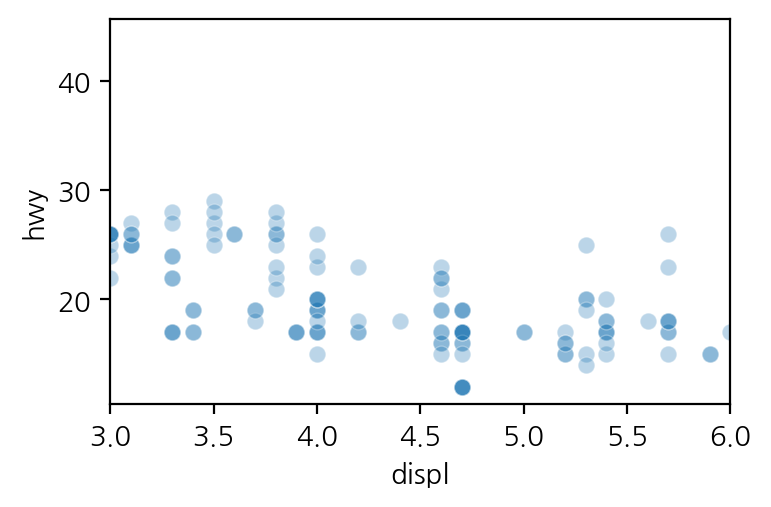

In [23]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.3).set(xlim = [3, 6]);

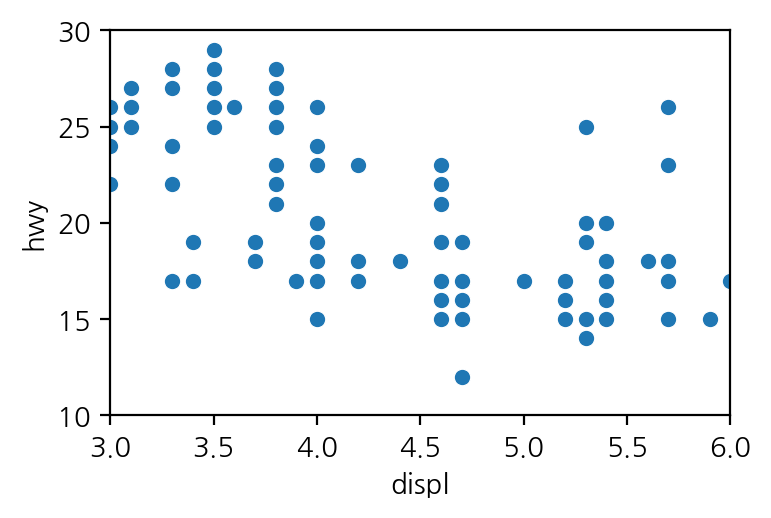

In [24]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3, 6], ylim = [10, 30]);

#### 종류별로 표식 색깔 바꾸기

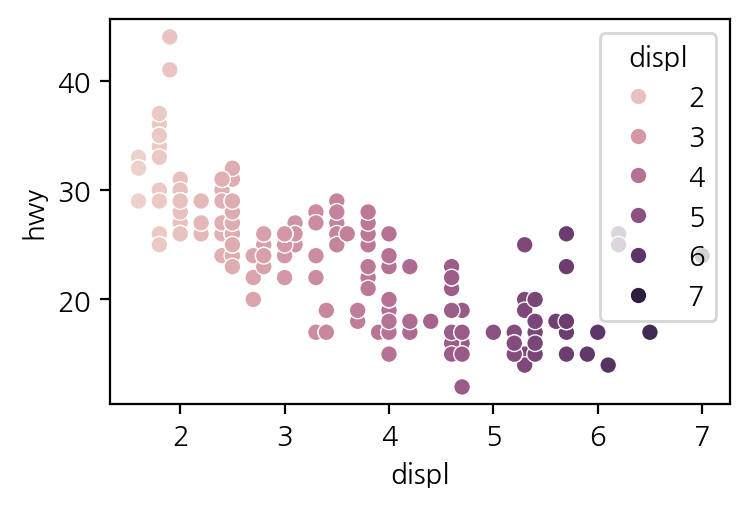

In [26]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'displ');

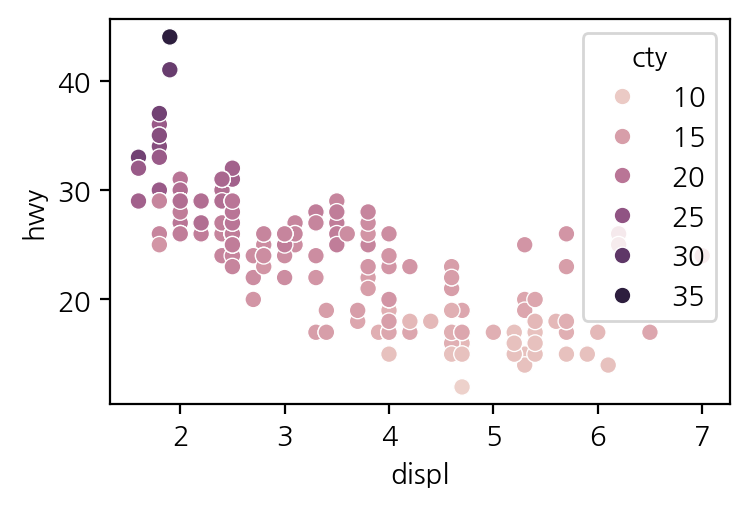

In [27]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'cty');

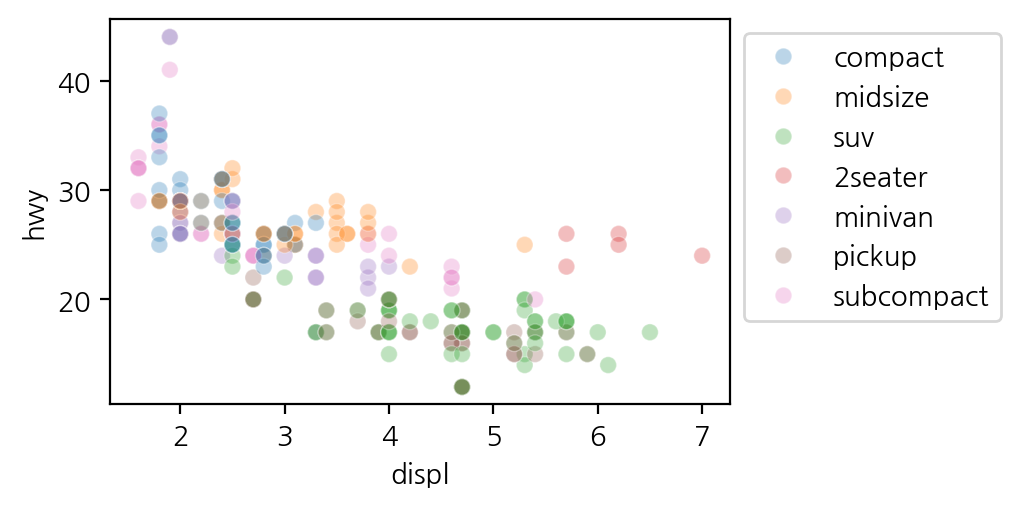

In [30]:
import matplotlib.pyplot as plt
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3);
plt.legend(bbox_to_anchor=(1, 1));

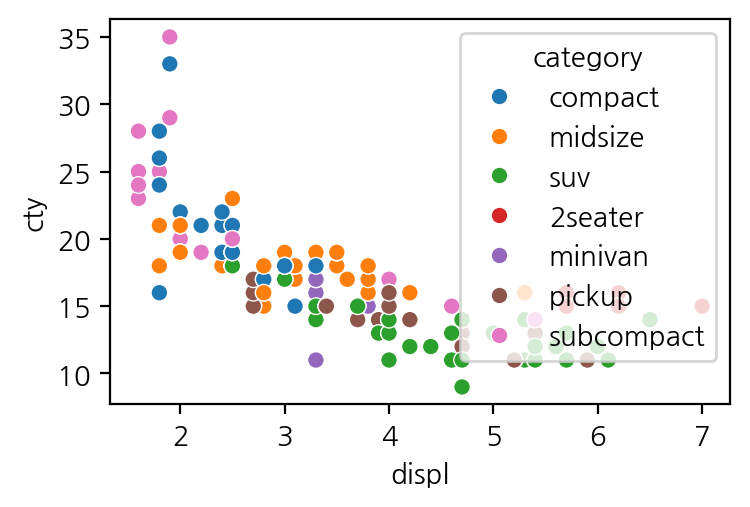

In [29]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'category');

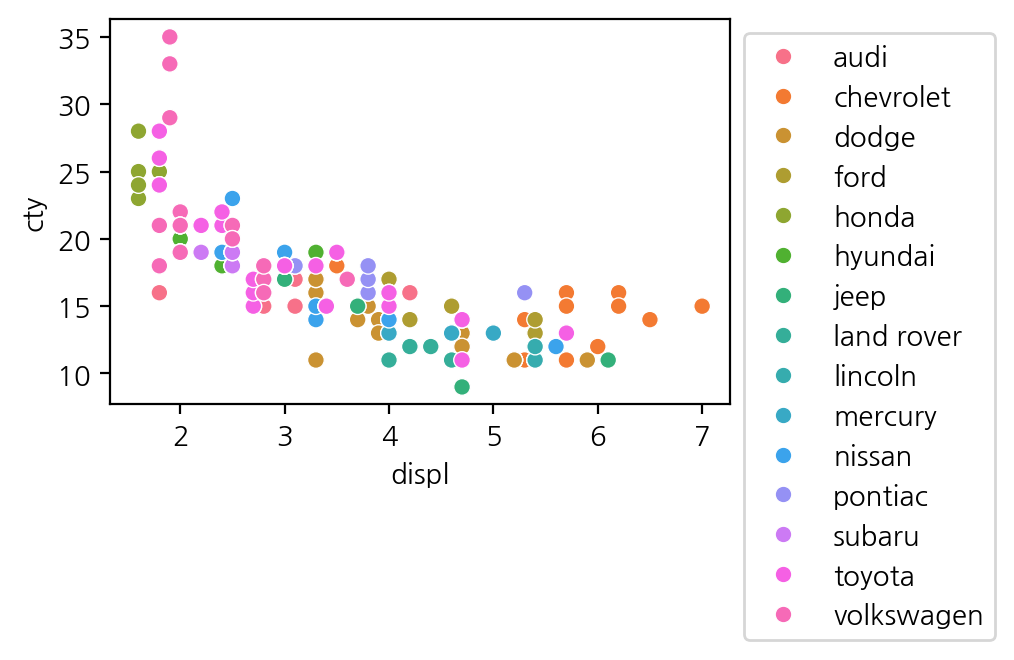

In [31]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'manufacturer');
# plt.legend(loc='best');
plt.legend(bbox_to_anchor=(1., 1.)); # 범례의 완쪽 모서리의 위치 지정, 1, 1: 원 그래프의 오른쪽 위 모서리

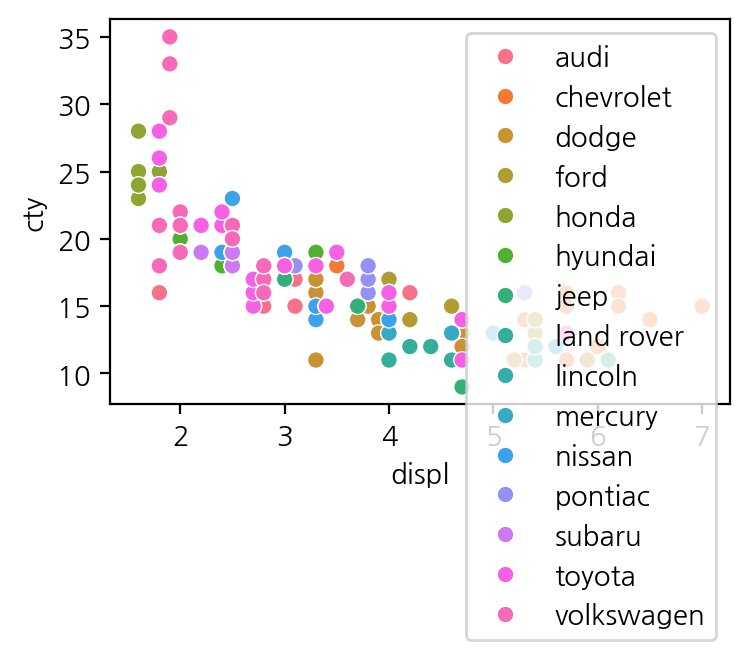

In [33]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'manufacturer');
plt.legend(loc='best');

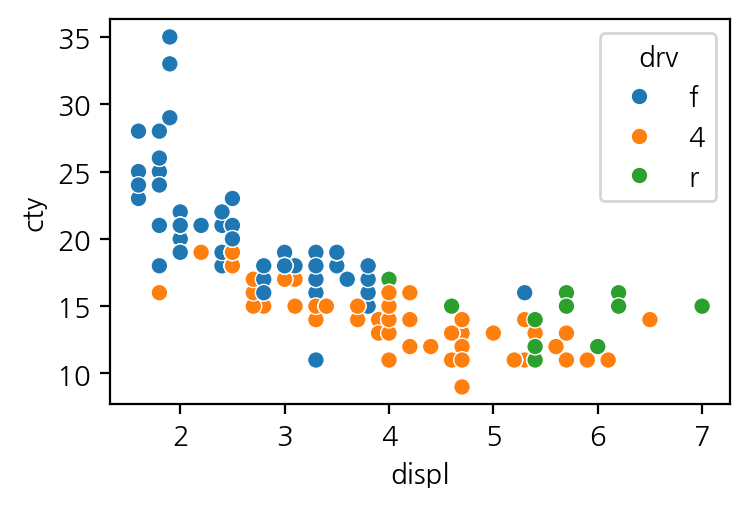

In [34]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'drv');

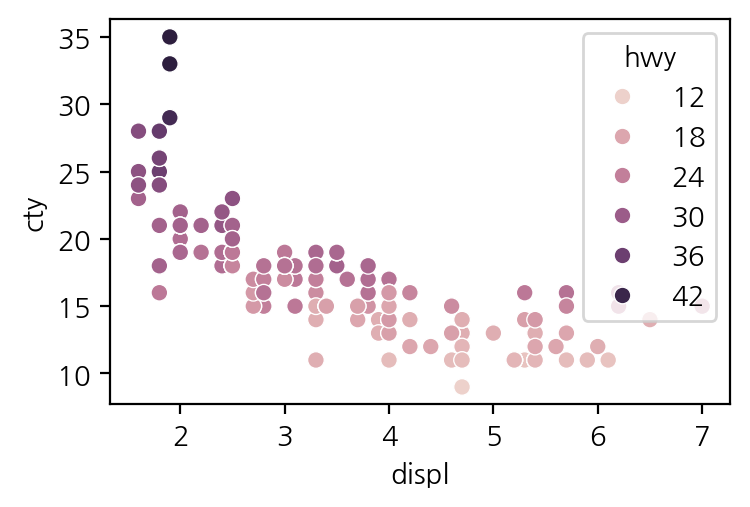

In [35]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'hwy');

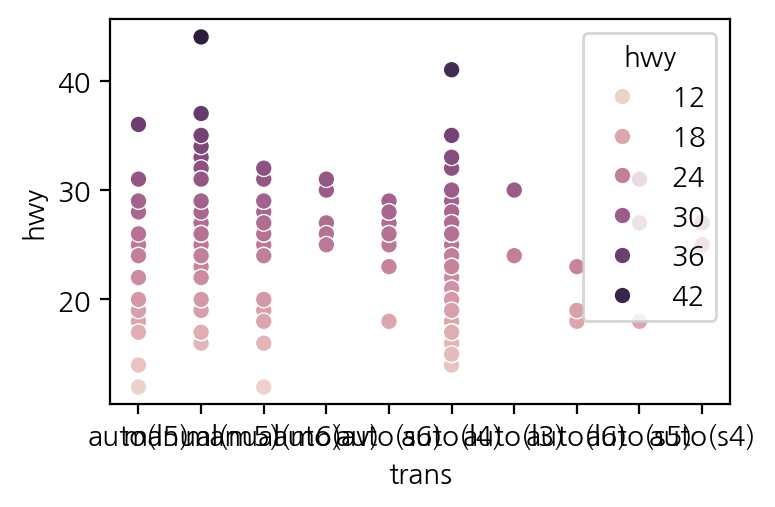

In [36]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');

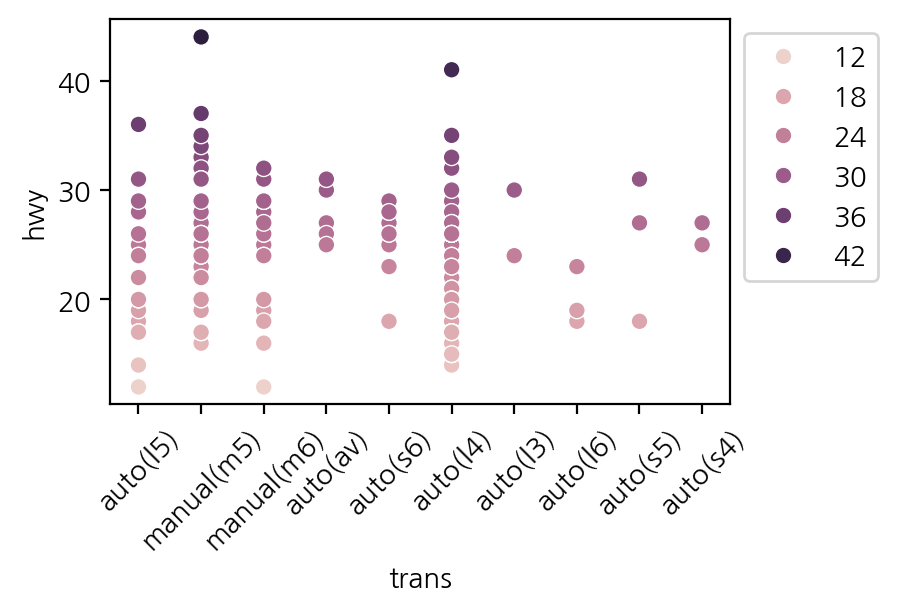

In [37]:
my_plot = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my_plot.tick_params(axis='x', labelrotation = 45) # 암기 x
my_plot.legend(bbox_to_anchor=(1., 1.));

## 08-3 막대 그래프 - 집단 간 차이 표현하기

### 평균 막대 그래프 만들기

#### 1. 집단별 평균표 만들기

In [43]:
mpg.groupby('drv')['hwy'].mean().to_frame()

,hwy
drv,
4,19.17
f,28.16
r,21.00


In [40]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean')) # groupby 시험 문제
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [50]:
# drv별 분리
# hwy 평균 구하기
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean')) # as_index
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


#### 2. 그래프 만들기

In [44]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [4, 2.5]})        # 그림 크기, 기본값 [6, 4]

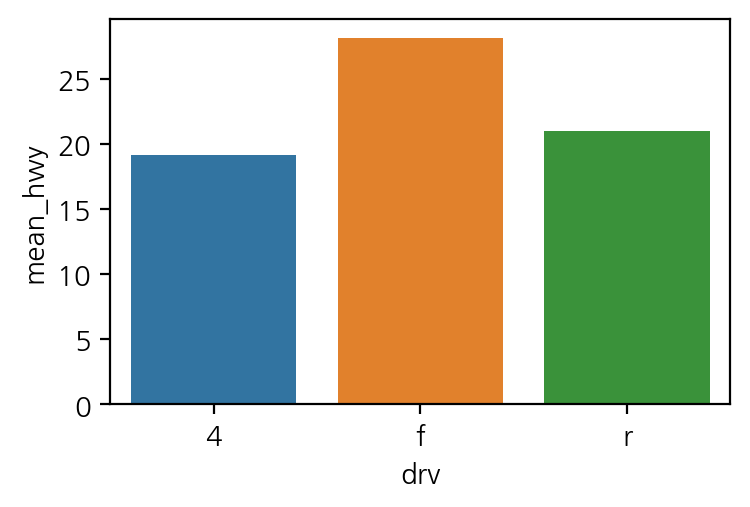

In [45]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv');

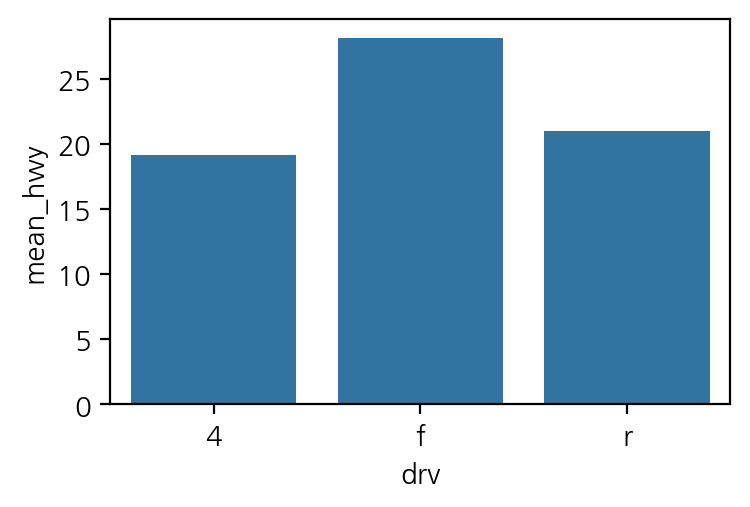

In [48]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');


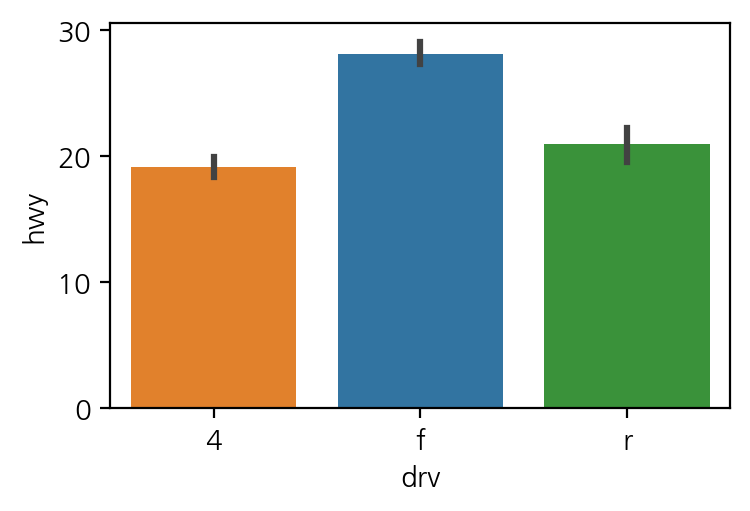

In [55]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'drv', order = ['4', 'f', 'r']);

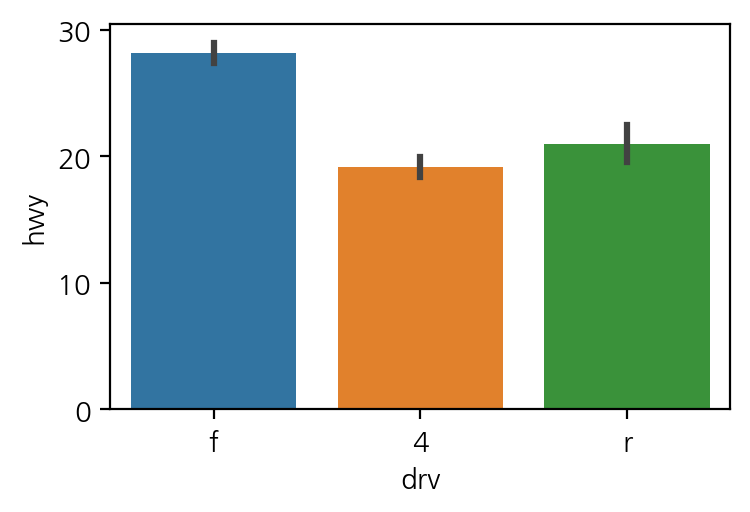

In [57]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'drv'); # order = 순서


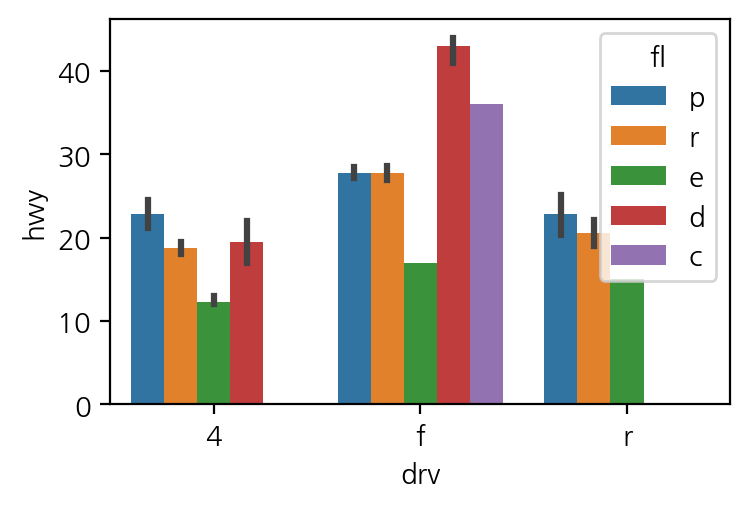

In [58]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'fl', order = ['4', 'f', 'r']);

#### 3. 크기순으로 정렬하기

In [60]:
pd.set_option('display.precision', 2)

df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


In [61]:
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False) # mean_hwy로 정렬, ascending = False , 내림차순
df_mpg

,drv,mean_hwy
1,f,28.16
2,r,21.00
0,4,19.17


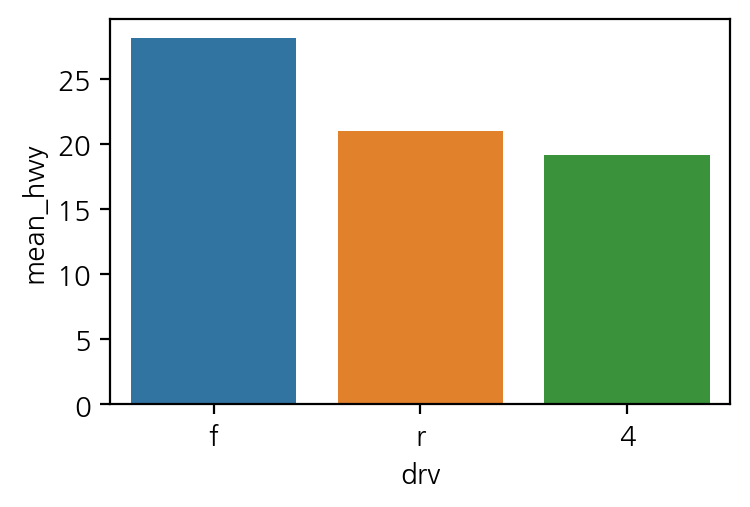

In [62]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv');

In [63]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


### 빈도 막대 그래프 만들기

#### 1. 집단별 빈도표 만들기


In [ ]:
mpg.groupby('drv', as_index = False).count()

In [ ]:
mpg.groupby('drv', as_index = False).count()[['drv', 'model']]

In [ ]:
# 집단별 빈도표 만들기
mpg.groupby('drv', as_index = False).count()[['drv', 'model']].rename(columns = {'model': 'n'})

In [ ]:
mpg

In [ ]:
# 집단별 빈도표 만들기, 시험 예상
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))
df_mpg

In [ ]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv', 'count'))
df_mpg2

#### 2. 그래프 만들기

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n', hue = 'drv');

#### sns.countplot()으로 빈도 막대 그래프 만들기

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv');

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv', hue = 'drv');

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv', hue = 'category');

In [ ]:
mpg['drv'].unique()

In [ ]:
df_mpg['drv'].unique()

**막대 정렬하기**

In [ ]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', hue = 'drv', order = ['4', 'f', 'r']);

In [ ]:
mpg['drv'].value_counts()

In [ ]:
# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

In [ ]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', hue = 'drv', order = mpg['drv'].value_counts().index);